# Computer Vision, Assignment 1: Elements of Projective Geometry

In this assignment you will study the basics of projective geometry. You will study the representations of points lines and planes, as well as transformations and camera matrices.

Please see Canvas for detailed instructions on what is expected for a passing/higher grade. All computer exercises not marked **OPTIONAL** are mandatory to complete. 

### Submission Requirements:
Your final lab submission should include:
1. Your edited **notebook file** (`.ipynb`).
2. An **HTML printout** of the executed notebook with all outputs visible: File → Save and export Notebook As → HTML
3. A **pdf report** containing answers to the theoretical exercises (see separate document).


In [1]:
# for creating responsive plots
%matplotlib  inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import cv2
import matplotlib.image as mpimg
from supplied import *

# Points in Homogeneous Coordinates

#### *Theoretical exercise 1* (see pdf)

## Computer Exercise 1
Write a function `pflat` that takes as input an array of shape $(m, n)$,
representing $n$ points in $\mathbb P^{m-1}$ in homogeneous coordinates. The output should be an $(m, n)$-array
containing the same homogeneous points, but where each point is normalized so that its last coordinate
is 1. (You may assume that none of the points have last homogeneous coordinate zero.) Apply the
function to the points in `x2D` and `x3D` in the file `compEx1.mat`, and plot the result. It will be useful
for later to also create a function `plot_points_2D` that takes as input a $(2, n)$-array representing n
two dimensional points in Cartesian coordinates and plots them. And a similar `plot_points_3D` for
three dimensional points.

**Useful python commands:**

`ax.view_init(40, 35)` # to view a 3D plot from a specific angle

`ax.set_aspect('equal')` # makes sure that all axes have the same scale

In [2]:
def pflat(x):
    
    # Your code here
    X = np.asarray(x, dtype=float)

    if X.ndim != 2:
        raise ValueError("pflat: förväntar en 2D-array.")

    if X.shape[0] <= X.shape[1]:      
        w = X[-1, :]
        eps = 1e-12
        w = np.where(np.abs(w) < eps, eps, w)
        x_flat = X[:-1, :] / w
    else:                              
        w = X[:, -1]
        eps = 1e-12
        w = np.where(np.abs(w) < eps, eps, w)[:, None]
        x_flat = X[:, :-1] / w

    return x_flat


def plot_points_2D(points):
    
    # Your code here
    P = np.asarray(points, dtype=float)
    if P.shape[0] == 2:
        x, y = P[0, :], P[1, :]
    elif P.shape[1] == 2:
        x, y = P[:, 0], P[:, 1]
    else:
        raise ValueError("plot_points_2D: förväntar (2, n) eller (n, 2).")

    plt.plot(x, y, linestyle="None", marker=".", markersize=6)
    ax = plt.gca()
    ax.set_aspect('equal')
    ax.set_xlabel('x'); ax.set_ylabel('y')
    ax.grid(True, alpha=0.3)


def plot_points_3D(points, ax=None, kwargs={}):
    
    # Your code here
    P = np.asarray(points, dtype=float)
    if P.shape[0] == 3:
        X, Y, Z = P[0, :], P[1, :], P[2, :]
    elif P.shape[1] == 3:
        X, Y, Z = P[:, 0], P[:, 1], P[:, 2]
    else:
        raise ValueError("plot_points_3D: förväntar (3, n) eller (n, 3).")

    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

    if kwargs:
        ax.plot(X, Y, Z, **kwargs)
    else:
        ax.plot(X, Y, Z, linestyle="None", marker=".", markersize=6)

  
    try:
        ax.set_box_aspect((1, 1, 1))
    except Exception:
        pass
    ax.view_init(40, 35)
    ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')


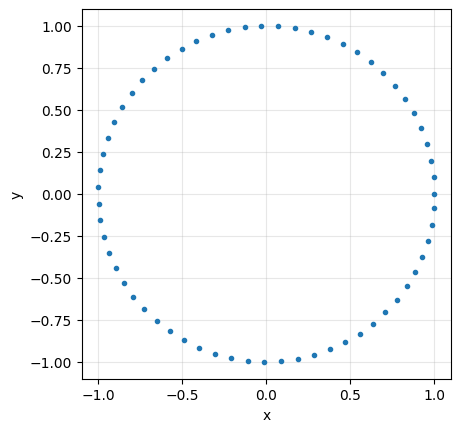

<Figure size 640x480 with 0 Axes>

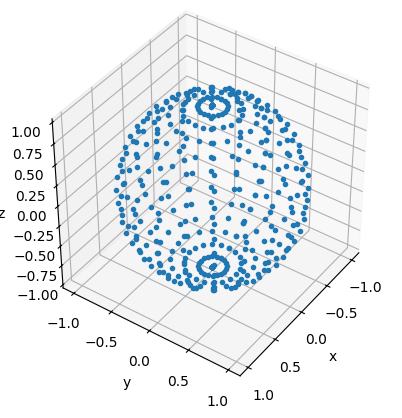

In [3]:
data = sp.io.loadmat('data/compEx1.mat')
x2D = data['x2D']
x3D = data['x3D']

plt.figure(1)
x2D_flat = pflat(x2D)
plot_points_2D(x2D_flat)
plt.show()

plt.figure(2)
x3D_flat = pflat(x3D)
plot_points_3D(x3D_flat)
plt.show()

# Lines

#### *Theoretical exercises: 2 and 3* (see pdf)

## Computer Exercise 2
Load and plot the image in `compEx2.jpg`. In the file `compEx2.mat` there are three pairs of image points.
Plot the image points in the same figure as the image. For each pair of points compute the line going through the points. 
Use the supplied function `rital` to plot the lines in the same image.
**Do these lines appear to be parallel (in 3D)?**
Compute the point of intersection between the second and third line (the lines obtained from the pairs `p2` and `p3`.
Plot this point in the same image.

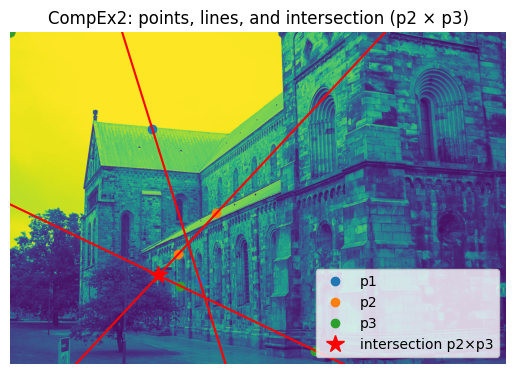

In [4]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat 
img = plt.imread('data/compEx2.jpg')
D = loadmat('data/compEx2.mat')
pairs = [D['p1'], D['p2'], D['p3']]

def to_h(P):
    P = np.asarray(P, float)
    if P.shape[0] > P.shape[1]:
        P = P.T
    if P.shape[0] == 2:
        P = np.vstack([P, np.ones((1, P.shape[1]))])
    return P

fig, ax = plt.subplots()
ax.imshow(img)
ax.set_axis_off()

cols = ['tab:blue', 'tab:orange', 'tab:green']
lines = []

for i, P in enumerate(pairs):
    Ph = to_h(P)
    ax.plot(Ph[0]/Ph[2], Ph[1]/Ph[2], 'o', ms=6, color=cols[i], label=f'p{i+1}')
    l = np.cross(Ph[:,0], Ph[:,1])
    n = np.linalg.norm(l[:2]) or 1.0
    l = l / n
    lines.append(l)
    rital(l.reshape(1, 3))

x = np.cross(lines[1], lines[2])
x = x / (x[-1] if abs(x[-1]) > 1e-12 else 1e-12)
ax.plot(x[0], x[1], '*', ms=13, color='red', label='intersection p2×p3')

ax.legend(loc='lower right')
plt.title('CompEx2: points, lines, and intersection (p2 × p3)')
plt.show()


The distance between a 2D-point $x=(x_1,x_2)$ in Cartesian coordinates and a line $l = (a,b,c)$ can be computed using the distance formula
\begin{equation}
d = \frac{|ax_1+bx_2+c|}{\sqrt{a^2+b^2}},
\end{equation}
see your linear algebra book.
Implement a function `point_line_distance_2D` that computes the distance between a point and a line.
Compute the distance between the first line and the intersection point. **Is it close to zero? Why/why not?**

In [5]:
def point_line_distance_2D(p, l):
    
    # Your code here

    p = np.asarray(p, float).reshape(-1)
    if p.size == 3:
        p = p[:2] / (p[-1] if abs(p[-1]) > 1e-12 else 1e-12)
    a, b, c = np.asarray(l, float).ravel()[:3]
    return float(abs(a*p[0] + b*p[1] + c) / (np.hypot(a, b) if np.hypot(a, b) > 1e-12 else 1e-12))
l1 = lines[0]
pi = x[:2]



In [6]:
d = point_line_distance_2D(pi, l1)
print(f"Distance: {d}")

Distance: 147.30545648496062


### Your answer here: 

(*Include answers to all questions marked in bold.*)
#



# Projective Transformations

#### *Theoretical exercises: 4, 5, 6* (see pdf)

# The Pinhole Camera

#### *Theoretical exercise 7* (see pdf)

## Computer Exercise 3
Load and plot the images `compEx3im1.jpg` and `compEx3im2.jpg`.
The file `compEx3.mat` contains the camera matrices `P1`, `P2` and a point model `U` of the statue.

In order to visualize cameras in 3D it is useful to plot them as vectors pointing from the camera center in the direction of the principal axis.
Implement a function `camera_center_and_axis` that takes a camera matrix as input and outputs
the camera center and principal axis.
The camera center should be in Cartesian coordinates and the principal axis should be normalized to length 1.
Compute the camera centers and principal axes of the two cameras.

In [9]:
def camera_center_and_axis(P):
    """P is 3x4 camera matrix."""
    import numpy as np
    from scipy import linalg as la
    P = np.array(P)
    # camera center: nullspace of P (homogeneous)
    U, S, Vt = la.svd(P)
    C_h = Vt[-1, :]
    C = (C_h[:3] / C_h[3]).reshape(3,)
    # principal axis: compute R from RQ of M = P[:,:3]
    M = P[:, :3]
    # RQ decomposition (use scipy.linalg.rq)
    try:
        from scipy.linalg import rq
        K, R = rq(M)
    except Exception:
        # fallback using QR on reversed matrix
        Q, Rq = la.qr(np.flipud(M).T)
        R = np.flipud(Rq.T)
        K = np.flipud(Q.T)
    # Ensure R is proper rotation (det positive)
    if np.linalg.det(R) < 0:
        R = -R
    # principal axis in world coordinates = R^T * [0,0,1]
    pr_axis = R.T[:, 2]
    # normalize
    pr_axis = pr_axis / np.linalg.norm(pr_axis)
    return C, pr_axis


Camera center 1:
[0. 0. 0.]

Principal axis 1:
[-0.31292281 -0.94608467 -0.08368463]

Camera center 2:
[  6.6352039   14.84597919 -15.06911585]

Principal axis 2:
[-0.03186384 -0.34016542 -0.93982561]


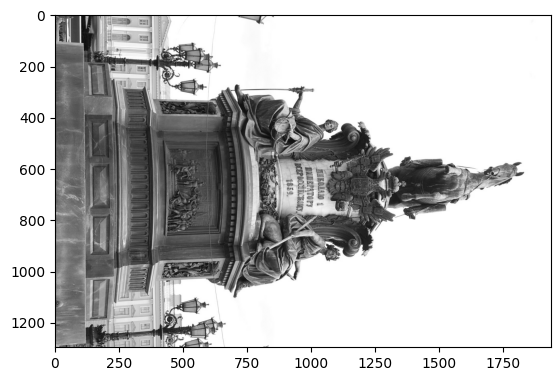

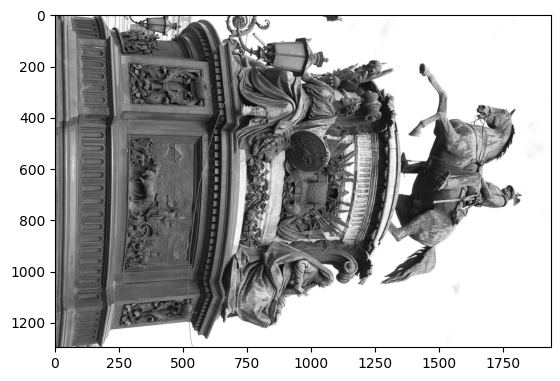

In [10]:
data = sp.io.loadmat('data/compEx3.mat')
U = data['U']
P1 = data['P1']
P2 = data['P2']
img1 = plt.imread('data/compEx3im1.jpg')
img2 = plt.imread('data/compEx3im2.jpg')

plt.figure(4) 
plt.imshow(img1, cmap='gray')
plt.figure(5)
plt.imshow(img2, cmap='gray')

# Compute the camera centers and principal axes of the two cameras
C1, pr1 = camera_center_and_axis(P1)
print(f"Camera center 1:\n{C1}")
print(f"\nPrincipal axis 1:\n{pr1}")

C2, pr2 = camera_center_and_axis(P2)
print(f"\nCamera center 2:\n{C2}")
print(f"\nPrincipal axis 2:\n{pr2}")

Next, implement a function `plot_camera` which takes a camera matrix and a scale $s$ as input and plots the principal axis of the camera scaled by $s$, from the camera center. 
Plot the 3D-points in `U` and the camera centers in the same 3D plot
(make sure that the 4th coordinate of `U` is one before you plot by using `pflat`.

**Useful python commands:**

`mpl_toolkits.mplot3d.axes3d.Axes3D.quiver` # can be used to plot arrows in a 3D plot

In [11]:
def plot_camera(camera_matrix, s, ax=None):
    """Plot camera center and principal axis as an arrow scaled by s on provided 3D axis."""
    import numpy as np
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    C, pr = camera_center_and_axis(camera_matrix)
    # plot camera center
    ax.scatter([C[0]],[C[1]],[C[2]], marker='o')
    # plot principal axis as arrow
    ax.quiver(C[0], C[1], C[2], pr[0]*s, pr[1]*s, pr[2]*s, length=1)
    return ax


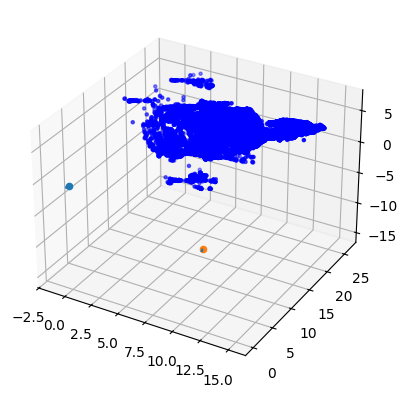

In [12]:
# Plot the 3D-points in U and the camera centers and principal axes in the same 3D plot

# Your code here
def pflat(X):
    """Convert homogeneous coordinates to Cartesian."""
    return X[:-1] / X[-1]

# Flatten U
U_cartesian = pflat(U)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot 3D points
ax.scatter(U_cartesian[0], U_cartesian[1], U_cartesian[2], c='b', marker='.')

# Plot cameras
plot_camera(P1, s=0.5, ax=ax)
plot_camera(P2, s=0.5, ax=ax)

plt.show()


Finally, project the points in `U` into the cameras `P1` and `P2` and plot the result in the same plots as the images.
**Does the result look reasonable?** 

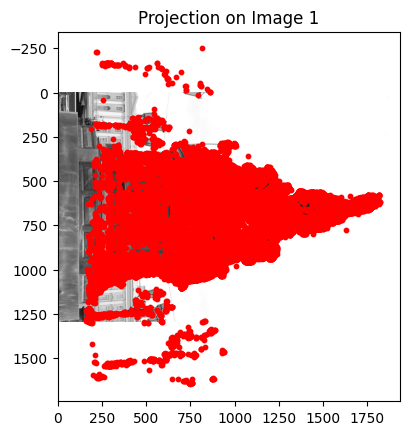

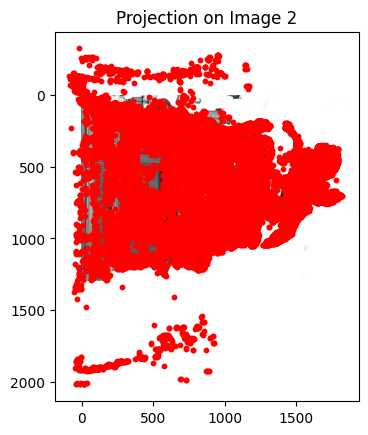

In [13]:

# Your code here
def project_points(P, U):
    """Project 3D points U into camera P."""
    x = P @ U
    x = x / x[2]  # normalize
    return x[:2]

# Project points
proj1 = project_points(P1, U)
proj2 = project_points(P2, U)

# Plot on images
plt.figure()
plt.imshow(img1, cmap='gray')
plt.scatter(proj1[0], proj1[1], c='r', s=10)
plt.title('Projection on Image 1')

plt.figure()
plt.imshow(img2, cmap='gray')
plt.scatter(proj2[0], proj2[1], c='r', s=10)
plt.title('Projection on Image 2')

plt.show()

### Your answer here: 

(*Include answers to all questions marked in bold.*)
#



#### *Theoretical exercise 8* (OPTIONAL, 10 optional points, see pdf)

## Computer Exercise 4 (OPTIONAL, 15 optional points)
Load and plot the image compEx4.jpg, which is an image of a poster. (Here the axes units are pixels.)
The file `compEx4.mat` contains the inner parameters `K`, the corner points of the poster and the 3D plane `v` that contains the poster.
The camera matrix for the camera that generated this image is 
\begin{equation}
P_1 = K [ I \ 0].
\end{equation}
The goal of this exercise is to create an image of the poster taken by a camera 
2m to the right of the original camera.

Start by plotting the corner points and the image in the same 2D-figure. (Make sure to set equal aspect ratio.) Note the scale on the axis. **Where is the origin of the image coordinate system located?**

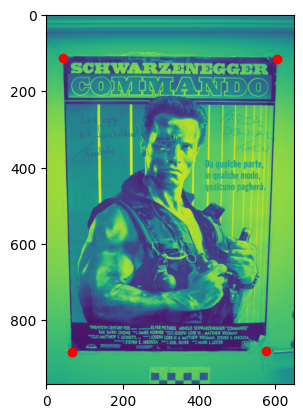

In [14]:

# Your code here


img = plt.imread('data/compEx4.jpg')
D = loadmat('data/compEx4.mat')

def pick(d, names):
    for n in names:
        if n in d: return d[n]
    return None

def to_xy(P):
    P = np.asarray(P, float)
    if P.shape[0] > P.shape[1]:
        P = P.T
    if P.shape[0] == 3:
        P = P[:2] / P[2]
    return P

K = pick(D, ['K','k'])
v = pick(D, ['v','V'])
C = pick(D, ['corners','pts','points','x','X'])
Cxy = to_xy(C)

fig, ax = plt.subplots()
ax.imshow(img)
ax.plot(Cxy[0], Cxy[1], 'ro', ms=6)
ax.set_aspect('equal')
plt.show()


#### Your answer here: 
#

To be able to use the formulas derived in Theoretical Exercise 8, we must first ensure that we have calibrated cameras.
To do this, normalize the corner points by multiplying with $K^{-1}$ and plot them in a new 2D-figure. Use `ax.yaxis.set_inverted(True)` to make the y-axis point downwards (as for the previous image) and set equal aspect ratio.
Note the difference in scale compared to the previous figure. **Where is the origin of the image coordinate system located?**

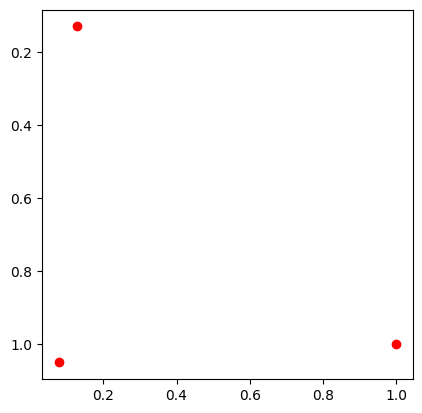

In [15]:
# Your code here

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

D = loadmat('data/compEx4.mat')
K = D['K'] if 'K' in D else D['k']
C = D['corners'] if 'corners' in D else (D['x'] if 'x' in D else D['X'])
C = np.asarray(C, float)
if C.shape[0] < C.shape[1]:
    C = C.T

if C.shape[0] == 4:
    P1 = K @ np.hstack([np.eye(3), np.zeros((3,1))])
    x = P1 @ C
elif C.shape[0] == 3:
    x = C
elif C.shape[0] == 2:
    x = np.vstack([C, np.ones((1, C.shape[1]))])
else:
    raise ValueError("Unexpected corner array shape.")

x_norm = np.linalg.inv(K) @ x
x_norm = x_norm[:2] / x_norm[2]

fig, ax = plt.subplots()
ax.plot(x_norm[0], x_norm[1], 'ro')
ax.set_aspect('equal')
ax.yaxis.set_inverted(True)
plt.show()



#### Your answer here: 
#

Since the inner parameters $K$ have been removed our calibrated camera is $[I \ 0]$.
Using the results from Theoretical Exercise 8, compute the 3D points in the plane `v` that project onto the corner points.
Compute the camera center and principal axis, and plot together with the 3D-points. Use the supplied function `axis3D_equal` to ensure equal aspect ratio. Does it look reasonable?

Next, compute a new camera with camera center in $(2,0,0)$ (2 units to the right of $P_1$)
and orientation 
\begin{equation}
R = \left( \begin{array}{ccc}
\cos(\pi/6) & 0 & \sin(\pi/6) \\
0 & 1 & 0 \\
-\sin(\pi/6) & 0 & \cos(\pi/6)
\end{array} \right)
\end{equation}
($-30$ degrees rotation around the y-axis. Note that the y-axis points down in the first image.)
Compute the new camera and plot in the same figure. (Don't forget to ensure equal aspect ratio.)


In [ ]:

# Your code here


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 3)

Compute the homography in Theoretical Exercise 8 and transform the normalized corner points
to the new (virtual) image. Plot the transformed points (don't forget to divide by the third coordinate) in a new 2D-figure.
**Does the result look like you would expect it to when moving the camera like this?**
Also, project the 3D points into the same image using the camera matrix. Does this give the same result?

In [ ]:

# Your code here


#### Your answer here: 
#

We now have a homography that takes normalized points in the first camera and transforms them to normalized points in the second camera.
To remove the need for normalization we simply include the normalization in the homography.
If $\tilde{x} = K^{-1} x$ and $\tilde{y} = K^{-1} y$ then for the normalized points $\tilde{x}$ and $\tilde{y}$ we have
\begin{equation}
\tilde{y} \sim H \tilde{x} \Leftrightarrow  K^{-1}y \sim H K^{-1} x \Leftrightarrow y \sim K H K^{-1} x
\end{equation}
Therefore the total transformation is $H_{tot} = KHK^{-1}$.
Transform the original image and the corner points using the homography $H_{tot}$ and plot both in a new 2D-figure.


**Useful python commands:**

`transformed_img = cv2.warpPerspective(img, H_tot, (img.shape[1], img.shape[0]))` # can be used to apply the homography H_tot to the image

In [ ]:

# Your code here
